# Graded Challenge 4
---

## Introduction

Name  : Izzatur Arrasya 002<br>

## Dataset Introduction
<b>Credit Card Dataset for Clustering</b> <br>

This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

## Objective

In this notebook of Milestone 1 was created to evaluate concept as follows:

1. Able to understand the concept of supervised learning
2. Able to prepare data for use in supervised learning
3. Able to implement supervised learning

## Import Library
---

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, rand_score
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

## Data Loading
---

In [3]:
#load data using pandas
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

From the data above, we get some of information of every column in data frame :

1. Column 'CUST_ID' : Identification of Credit Card holder (Categorical)
2. Column 'BALANCE' : Balance amount left in their account to make purchases
3. Column 'BALANCEFREQUENCY' : How frequently the Balance is updated, score between 0 and 1
4. Column 'PURCHASES' : Amount of purchases made from account
5. Column 'ONEOFFPURCHASES' : Maximum purchase amount done in one-go
6. Column 'INSTALLMENTSPURCHASES' : Amount of purchase done in installment
7. Column 'CASHADVANCE' : Cash in advance given by the user
8. Column 'PURCHASESFREQUENCY' : contact communication type
9. Column 'ONEOFFPURCHASESFREQUENCY' :How frequently the Purchases are being made, score between 0 and 1
10. Column 'PURCHASESINSTALLMENTSFREQUENCY' : How frequently purchases in installments are being done
11. Column 'CASHADVANCEFREQUENCY' : How frequently the cash in advance being paid
12. Column 'CASHADVANCETRX' : Number of Transactions made with "Cash in Advanced"
13. Column 'PURCHASESTRX : Number of purchase transactions madelast contacted from a previous campaign
14. Column 'CREDITLIMIT ' : Limit of Credit Card for user
15. Column 'PAYMENTS': Amount of Payment done by user
16. Column 'MINIMUM_PAYMENTS' : Minimum amount of payments made by user
17. Column 'PRCFULLPAYMENT' : Percent of full payment paid by user
18. Column 'TENURE' : Tenure of credit card service for user

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
df.shape

(8950, 18)

## Data Cleaning
---

copy the dataframe so we have the original version of dataset as a backup if the work got messy

In [8]:
#copy dataframe
df_cc = df.copy()

In [9]:
#check any missing value
df_cc.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
#handle missing value
df_cc['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
df_cc['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [11]:
#recheck any missing value
df_cc.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
#checking any duplicate row
df_cc.duplicated().sum()

0

In [13]:
df_cc.drop(columns=['CUST_ID'], inplace=True)

## Exploration Data  Analysis
---

In [14]:
#copy dataframe
df_eda = df.copy()

In [15]:
df_eda.loc[:,['PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,95.40,0.00,95.40
1,0.00,0.00,0.00
2,773.17,773.17,0.00
3,1499.00,1499.00,0.00
4,16.00,16.00,0.00
...,...,...,...
8945,291.12,0.00,291.12
8946,300.00,0.00,300.00
8947,144.40,0.00,144.40
8948,0.00,0.00,0.00


In [16]:
def purchase(df_eda):
    if (df_eda['ONEOFF_PURCHASES']==0) & (df_eda['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (df_eda['ONEOFF_PURCHASES']>0) & (df_eda['INSTALLMENTS_PURCHASES']>0):
         return 'both'
    if (df_eda['ONEOFF_PURCHASES']>0) & (df_eda['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (df_eda['ONEOFF_PURCHASES']==0) & (df_eda['INSTALLMENTS_PURCHASES']>0):
        return 'installment'

In [17]:
df_eda['PURCHASES_TYPE']=df_eda.apply(purchase, axis=1)

In [18]:
df_eda['PURCHASES_TYPE'].value_counts()

both           2774
installment    2260
none           2042
one_off        1874
Name: PURCHASES_TYPE, dtype: int64

In [19]:
none = len(df_eda.loc[(df_cc['ONEOFF_PURCHASES']==0) & (df_eda['INSTALLMENTS_PURCHASES']==0)])

both = len(df_eda.loc[(df_cc['ONEOFF_PURCHASES']>0) & (df_eda['INSTALLMENTS_PURCHASES']>0)])

oopr = len(df_eda.loc[(df_cc['ONEOFF_PURCHASES']>0) & (df_eda['INSTALLMENTS_PURCHASES']==0)])

inpr = len(df_eda.loc[(df_cc['ONEOFF_PURCHASES']==0) & (df_eda['INSTALLMENTS_PURCHASES']>0)])


labels = ['None','Both','One Off Purchases','Installments Purchases']
values = [none, both, oopr, inpr]

fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo='label+percent',hole=0.3)])
fig.update_layout(
    title_text="Purchases by Purchases Type")
fig.show()

we can see that mostly from the data credit card users tends to using both installments and one off purchases

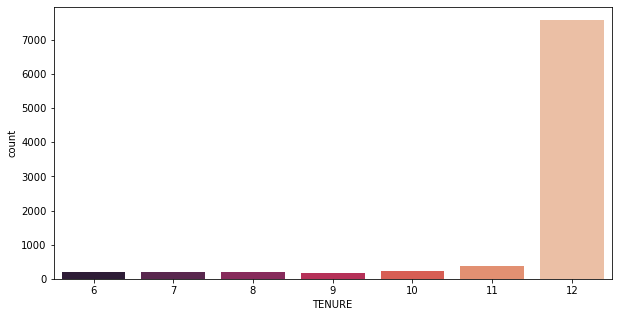

In [20]:
plt.figure(figsize=(10,5));
sns.countplot(data=df_eda, x="TENURE",  palette="rocket")
plt.show()

many of the credit card users had 12 month tenure

Text(0.5, 1.0, 'Correlation Matrix')

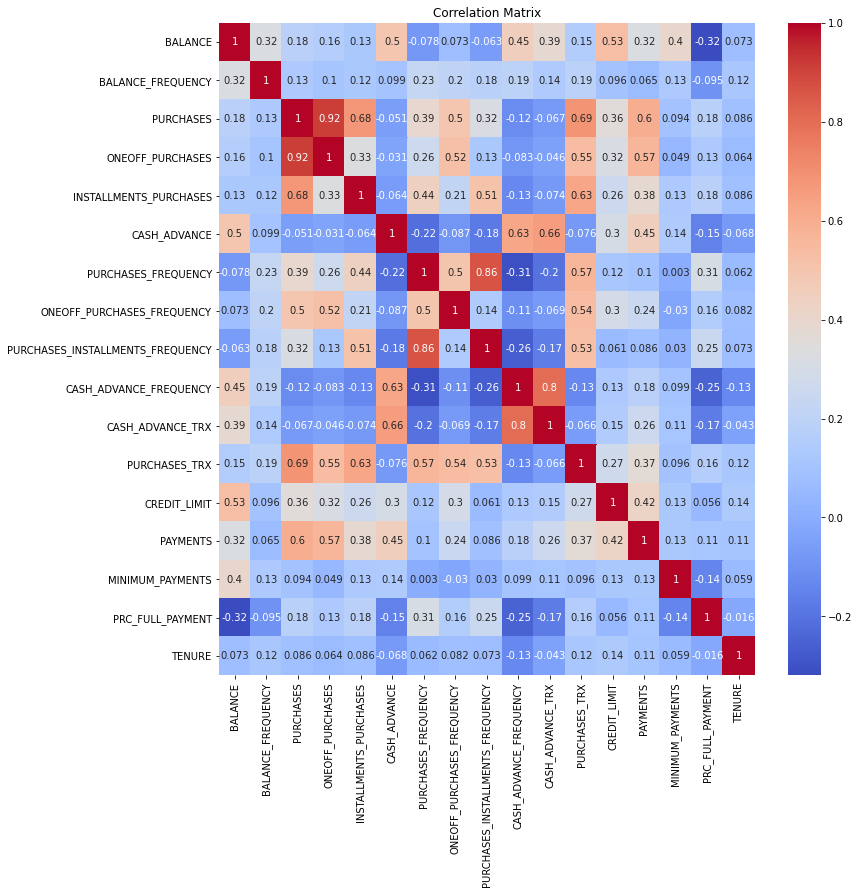

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(df_eda.corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')

## Data Preprocessing
---

In [22]:
#feature importance check
vif = pd.DataFrame()
vif["Feature"] = df_cc.columns
  
# calculating VIF for each feature
vif["VIF"] = [variance_inflation_factor(df_cc.values, i) for i in range(len(df_cc.columns))]

vif

,Feature,VIF
0,BALANCE,4.108714
1,BALANCE_FREQUENCY,18.108278
2,PURCHASES,58773.751426
3,ONEOFF_PURCHASES,32776.831050
4,INSTALLMENTS_PURCHASES,10399.626093
5,CASH_ADVANCE,3.461101
6,PURCHASES_FREQUENCY,26.445731
7,ONEOFF_PURCHASES_FREQUENCY,5.712731
8,PURCHASES_INSTALLMENTS_FREQUENCY,17.329860
9,CASH_ADVANCE_FREQUENCY,4.913554


we can see from the VIF table above we can reduct the dimension

In [23]:
#scaling the data
scaler = StandardScaler()
df_sc = scaler.fit_transform(df_cc)

In [24]:
df_sc

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

In [25]:
#reducting the dimension
pca= PCA()
pca.fit(df_sc)

PCA()

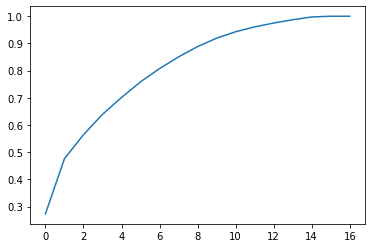

In [26]:
plt.plot(pca.explained_variance_ratio_.cumsum())

In [27]:
pca= PCA(n_components=6)
X= pca.fit_transform(df_sc)

NameError: name 'pca_sc' is not defined

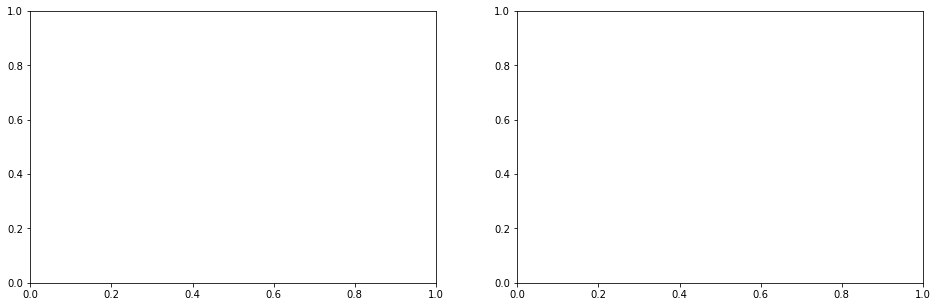

In [29]:
fig,ax=plt.subplots(ncols=2,figsize = (16,5))
ax[0].plot (range(1,18), pca_sc.explained_variance_ratio_)
ax[0].set_xlabel ('Components')
ax[0].set_ylabel ('Explained Variance Ratio')

ax[1].plot (range(1,18), np.cumsum(pca_sc.explained_variance_ratio_))
ax[1].set_xlabel ('Components')
ax[1].set_ylabel ('Explained Variance Ratio Cummulated')

## Definiton & Training Model
---

### K-Means

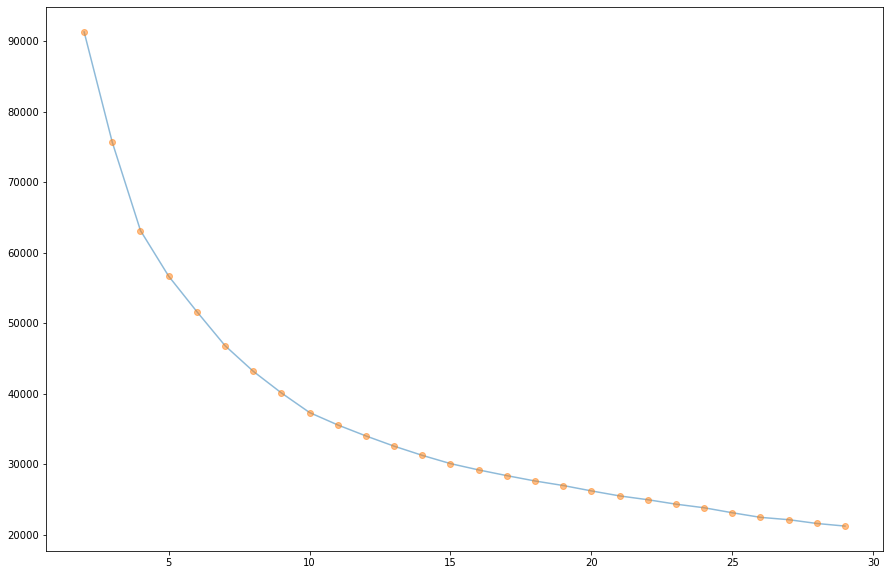

In [ ]:
plt.figure(figsize=(15,10))
distortions=[]
sil_scores=[]
for i in range(2,30):
    kmeans= KMeans(n_clusters=i, n_init=10, init= 'k-means++', algorithm='full', max_iter=300)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
    label= kmeans.labels_
    sil_scores.append(silhouette_score(X, label))
plt.plot(np.arange(2,30,1), distortions, alpha=0.5)
plt.plot(np.arange(2,30,1), distortions,'o' ,alpha=0.5)
plt.show()

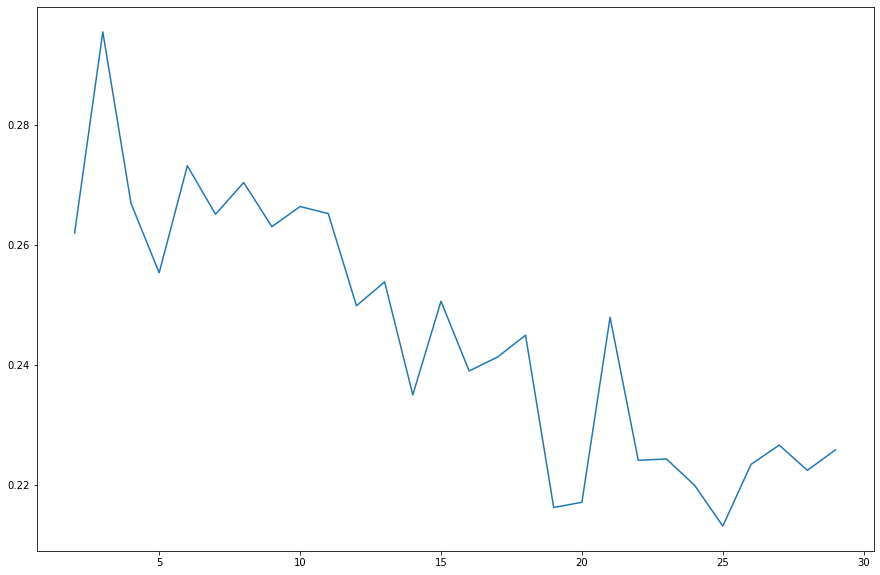

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(2,30,1), sil_scores)
plt.show()

In [ ]:
df_sc

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

In [ ]:
kmeans= KMeans(n_clusters=3, n_init=10, init= 'k-means++', algorithm='full', max_iter=300)
kmeans.fit(X)
labels= kmeans.labels_

In [ ]:
pca= PCA(n_components=2)
X2= pca.fit_transform(df_sc)

In [ ]:
pca_df = pd.DataFrame(data=X2, columns=['pca1','pca2'])
pca_df['labels']= labels
pca_df.head()

,pca1,pca2,labels
0,-1.683649,-1.072240,0
1,-1.134082,2.509151,2
2,0.969401,-0.383574,0
3,-0.888222,0.004649,0
4,-1.600021,-0.683794,0


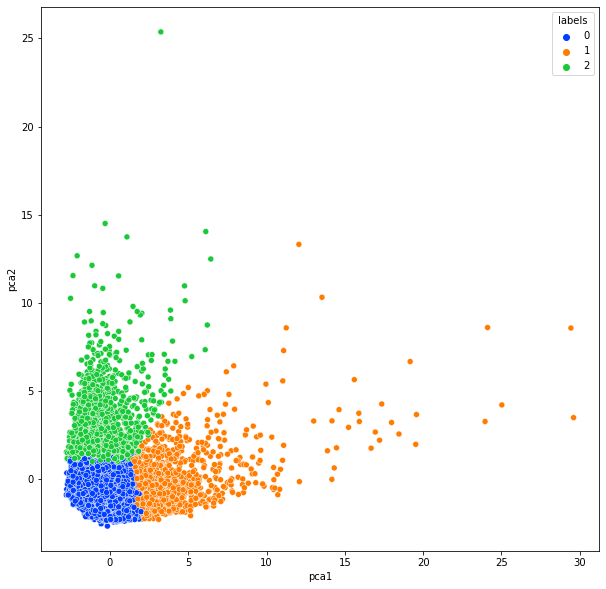

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='labels', data=pca_df, palette='bright')

the data clustered perfectly from 3 clusters

## Gaussian Mixture

In [ ]:
model = GaussianMixture(n_components=3)
y = model.fit_predict(df_sc)

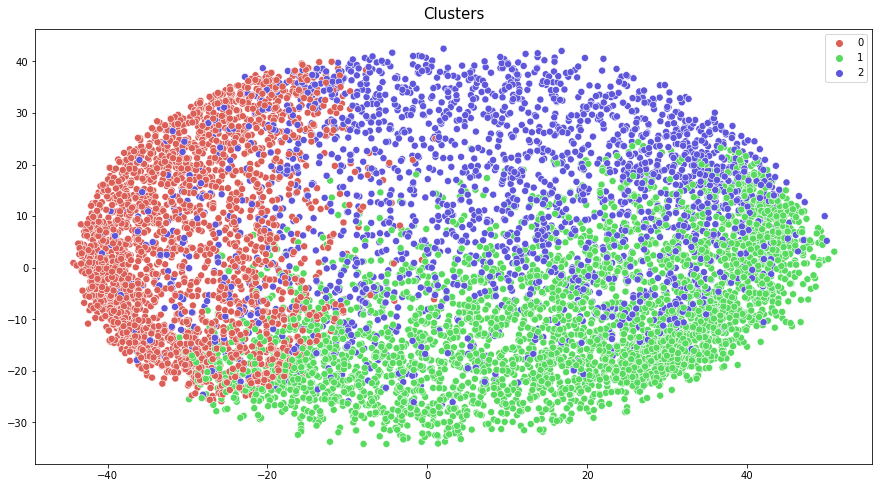

In [ ]:
dist = 1-cosine_similarity(df_sc)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)

# Visualizing all the clusters 
plt.figure(figsize=(15,8))
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], 
                hue=y, palette=sns.color_palette('hls', len(np.unique(y))), s=50)
plt.title('Clusters', size=15, pad=10)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

## Model Inference
---

In [ ]:
#Data Creation
sample = df_cc.sample(n=3, random_state=42)

#Data PreProcessing
samples = scaler.transform(sample) #scale data
X_sample = pca_sc.transform(samples) #reduct data


In [ ]:
#Predict data
km_sample = KMeans(n_clusters=3, random_state=42)
km_sample.fit(X_sample)

y_sample = km_sample.predict(X_sample)

#Result
sample_result = pd.concat([sample, pd.DataFrame(y_sample, columns=["PRED_LABEL"]).set_index(sample.index , drop=True)], axis =1)
sample_result

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PRED_LABEL
7669,16.834929,0.454545,15.00,15.00,0.00,209.025389,0.090909,0.090909,0.0,0.090909,1,1,7500.0,430.213001,86.959785,0.0,11,1
6125,540.020858,1.000000,612.23,495.61,116.62,1708.923217,0.666667,0.166667,0.5,0.333333,10,10,2000.0,1642.068707,419.956251,0.0,12,2
7028,119.237712,1.000000,342.74,0.00,342.74,0.000000,1.000000,0.000000,1.0,0.000000,0,20,2000.0,327.166041,165.207233,0.0,12,0


## Conclusion
---

1. from the purchases type we can conclude that the credit card holder using both (31%), installments purchases (25,3%), none (22,8%), and one off purchases (20,9%)
2. many of the holder had 12 month tenure
3. from dimensionality reduction using PCA and the most suitable is 3 dimension
4. clustering using K-Means and Gaussian Mixture models